# Bivariate Linear Bayesian Model Mixing with SAMBA toy models

This notebook shows how to use the Bayesian model mixing package **Taweret** for a toy problem. 

Author : Dan Liyanage 

Date : 11/10/2022

More about SAMBA toy models can be found in [Uncertainties here, there, and everywhere: interpolating between small- and large-g expansions using Bayesian Model Mixing](https://arxiv.org/abs/2206.04116)



## Steps for Bayesian Model Mixing with Taweret
    1. Define your models using BayesModel class in `Taweret.core.bayesmodel` (Only if you want to bring in your own models)
    2. Choose a Mixing method (Avilable mixing methods can be found in Taweret/mix)
    3. Find the posterior for the mixture weights (parameters in the mixture function) and/or model parameters by training the mixed model. 
    4. Make predictions! 

In [1]:
import sys

# You will have to change the following imports depending on where you have 
# the packages installed
sys.path.append("/Users/dananjayaliyanage/git/Taweret")
sys.path.append("/Users/dananjayaliyanage/git/SAMBA")

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
# To define priors. (uncoment if not using default priors)
import bilby

# For other operations
import numpy as np

### 1. Get toymodels and the psuedo-experimental data

In [2]:
# Toy models from SAMBA
from Taweret.models import samba_models as toy_models

m1 = toy_models.loworder(2, 'uninformative')
m2 = toy_models.highorder(2, 'uninformative')
truth = toy_models.true_model()
exp = toy_models.exp_data()

In [3]:
g = np.linspace(0.1, 0.6, 10)
plot_g = np.linspace(0.01,1,100)
m1_prediction = m1.evaluate(plot_g)
m2_prediction = m2.evaluate(plot_g)
true_output = truth.evaluate(plot_g)
exp_data= exp.evaluate(g,error = 0.01)

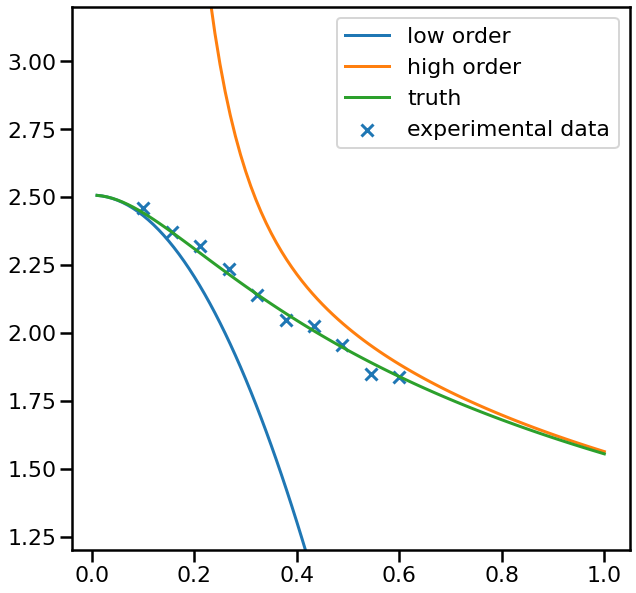

In [4]:

fig, ax_f = plt.subplots(figsize=(10,10))
ax_f.plot(plot_g, m1_prediction[0].flatten(), label='low order')
ax_f.plot(plot_g, m2_prediction[0].flatten(), label='high order')
ax_f.plot(plot_g, true_output[0], label='truth')
ax_f.scatter(g,exp_data[0], marker='x', label='experimental data')
ax_f.set_ylim(1.2,3.2)
ax_f.legend()

###  2. Choose a Mixing method

In [5]:
# Mixing method
from Taweret.mix.bivariate_linear import BivariateLinear as BL

models= {'low_order':m1,'high_order':m2}
mix_model = BL(models_dic=models, method='cdf')

cdf mixing function has 2 free parameter(s)
Default prior is set to {'cdf_0': Uniform(minimum=0, maximum=1, name='cdf_0', latex_label='cdf_0', unit=None, boundary=None), 'cdf_1': Uniform(minimum=0, maximum=1, name='cdf_1', latex_label='cdf_1', unit=None, boundary=None)}
To change the prior use `set_prior` method


In [7]:
#uncoment to change the prior from the default
priors = bilby.core.prior.PriorDict()
priors['cdf_0'] = bilby.core.prior.Uniform(-20,20, name="cdf_0")
priors['cdf_1'] = bilby.core.prior.Uniform(-20,20, name="cdf_1")
mix_model.set_prior(priors)

{'cdf_0': Uniform(minimum=-20, maximum=20, name='cdf_0', latex_label='cdf_0', unit=None, boundary=None),
 'cdf_1': Uniform(minimum=-20, maximum=20, name='cdf_1', latex_label='cdf_1', unit=None, boundary=None)}

### 3. Train to find posterior

16:54 bilby INFO    : Running for label 'cdf_mix', output will be saved to 'outdir'


The following Default settings for sampler will be used. You can changethese arguments by providing kwargs_for_sampler argement in `train`.Check Bilby documentation for other sampling options.
{'sampler': 'ptemcee', 'ntemps': 10, 'nwalkers': 20, 'Tmax': 100, 'nburn': 200, 'nsamples': 3000, 'threads': 5}


16:54 bilby INFO    : Search parameters:
16:54 bilby INFO    :   cdf_0 = Uniform(minimum=-20, maximum=20, name='cdf_0', latex_label='cdf_0', unit=None, boundary=None)
16:54 bilby INFO    :   cdf_1 = Uniform(minimum=-20, maximum=20, name='cdf_1', latex_label='cdf_1', unit=None, boundary=None)
16:54 bilby INFO    : Single likelihood evaluation took 6.936e-04 s
16:54 bilby WARNING : Supplied argument 'npool' not an argument of 'Ptemcee', removing.
16:54 bilby WARNING : Supplied argument 'nburn' not an argument of 'Ptemcee', removing.
16:54 bilby INFO    : Using sampler Ptemcee with kwargs {'ntemps': 10, 'nwalkers': 20, 'Tmax': 100, 'betas': None, 'a': 2.0, 'adaptation_lag': 10000, 'adaptation_time': 100, 'random': None, 'adapt': False, 'swap_ratios': False}
16:54 bilby INFO    : Using convergence inputs: ConvergenceInputs(autocorr_c=5, autocorr_tol=50, autocorr_tau=1, gradient_tau=0.1, gradient_mean_log_posterior=0.1, Q_tol=1.02, safety=1, burn_in_nact=50, burn_in_fixed_discard=0, mean_lo

279|0:01:11|nc:2.8e+05|a0:0.55-0.60|swp:0.83-1.00|n:-320<3000|t!1(+nan,+0.01)|q:1.00|0.51ms/ev
280|0:01:11|nc:2.8e+05|a0:0.55-0.60|swp:0.83-1.00|n:-300<3000|t!1(+nan,+0.03)|q:1.00|0.40ms/ev
281|0:01:12|nc:2.8e+05|a0:0.55-0.60|swp:0.83-1.00|n:-1280<3000|t!2(+nan,+0.04)|q:1.00|0.27ms/ev
282|0:01:12|nc:2.8e+05|a0:0.55-0.61|swp:0.83-1.00|n:-1260<3000|t!2(+nan,+0.03)|q:0.99|0.27ms/ev
283|0:01:12|nc:2.8e+05|a0:0.55-0.61|swp:0.83-1.00|n:-2240<3000|t!3(+nan,+0.03)|q:0.99|0.26ms/ev
284|0:01:13|nc:2.8e+05|a0:0.55-0.60|swp:0.83-1.00|n:-2220<3000|t!3(+nan,+0.02)|q:0.99|0.26ms/ev
285|0:01:13|nc:2.8e+05|a0:0.55-0.60|swp:0.83-1.00|n:-1600<3000|t!4(+nan,+0.02)|q:0.99|0.27ms/ev
286|0:01:13|nc:2.9e+05|a0:0.55-0.61|swp:0.83-1.00|n:-1590<3000|t!4(+nan,+0.02)|q:0.99|0.27ms/ev
287|0:01:13|nc:2.9e+05|a0:0.55-0.61|swp:0.83-1.00|n:-1580<3000|t!4(+nan,+0.02)|q:0.99|0.27ms/ev
288|0:01:14|nc:2.9e+05|a0:0.55-0.61|swp:0.83-1.00|n:-2070<3000|t!5(+nan,+0.03)|q:0.99|0.26ms/ev
289|0:01:14|nc:2.9e+05|a0:0.55-0.61|swp:0.

17:01 bilby INFO    : Finished sampling
17:01 bilby INFO    : Writing checkpoint and diagnostics
17:01 bilby INFO    : Finished writing checkpoint
17:01 bilby INFO    : Sampling time: 0:07:44.309974
17:01 bilby INFO    : Summary of results:
nsamples: 3340
ln_noise_evidence:    nan
ln_evidence:  0.730 +/-  0.326
ln_bayes_factor:    nan +/-  0.326



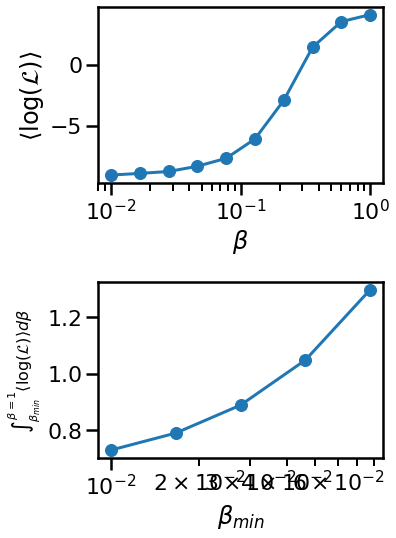

In [8]:
result = mix_model.train(x_exp=g, y_exp=exp_data[0], y_err=exp_data[1],label='cdf_mix')

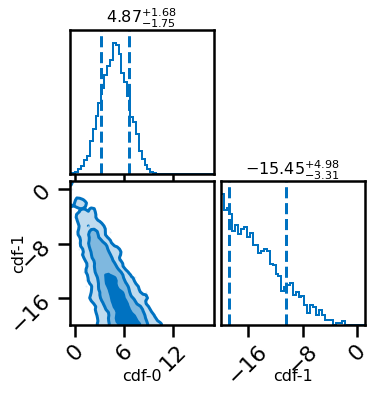

In [9]:
# Posterior of the mixing parameters. 
result.plot_corner()

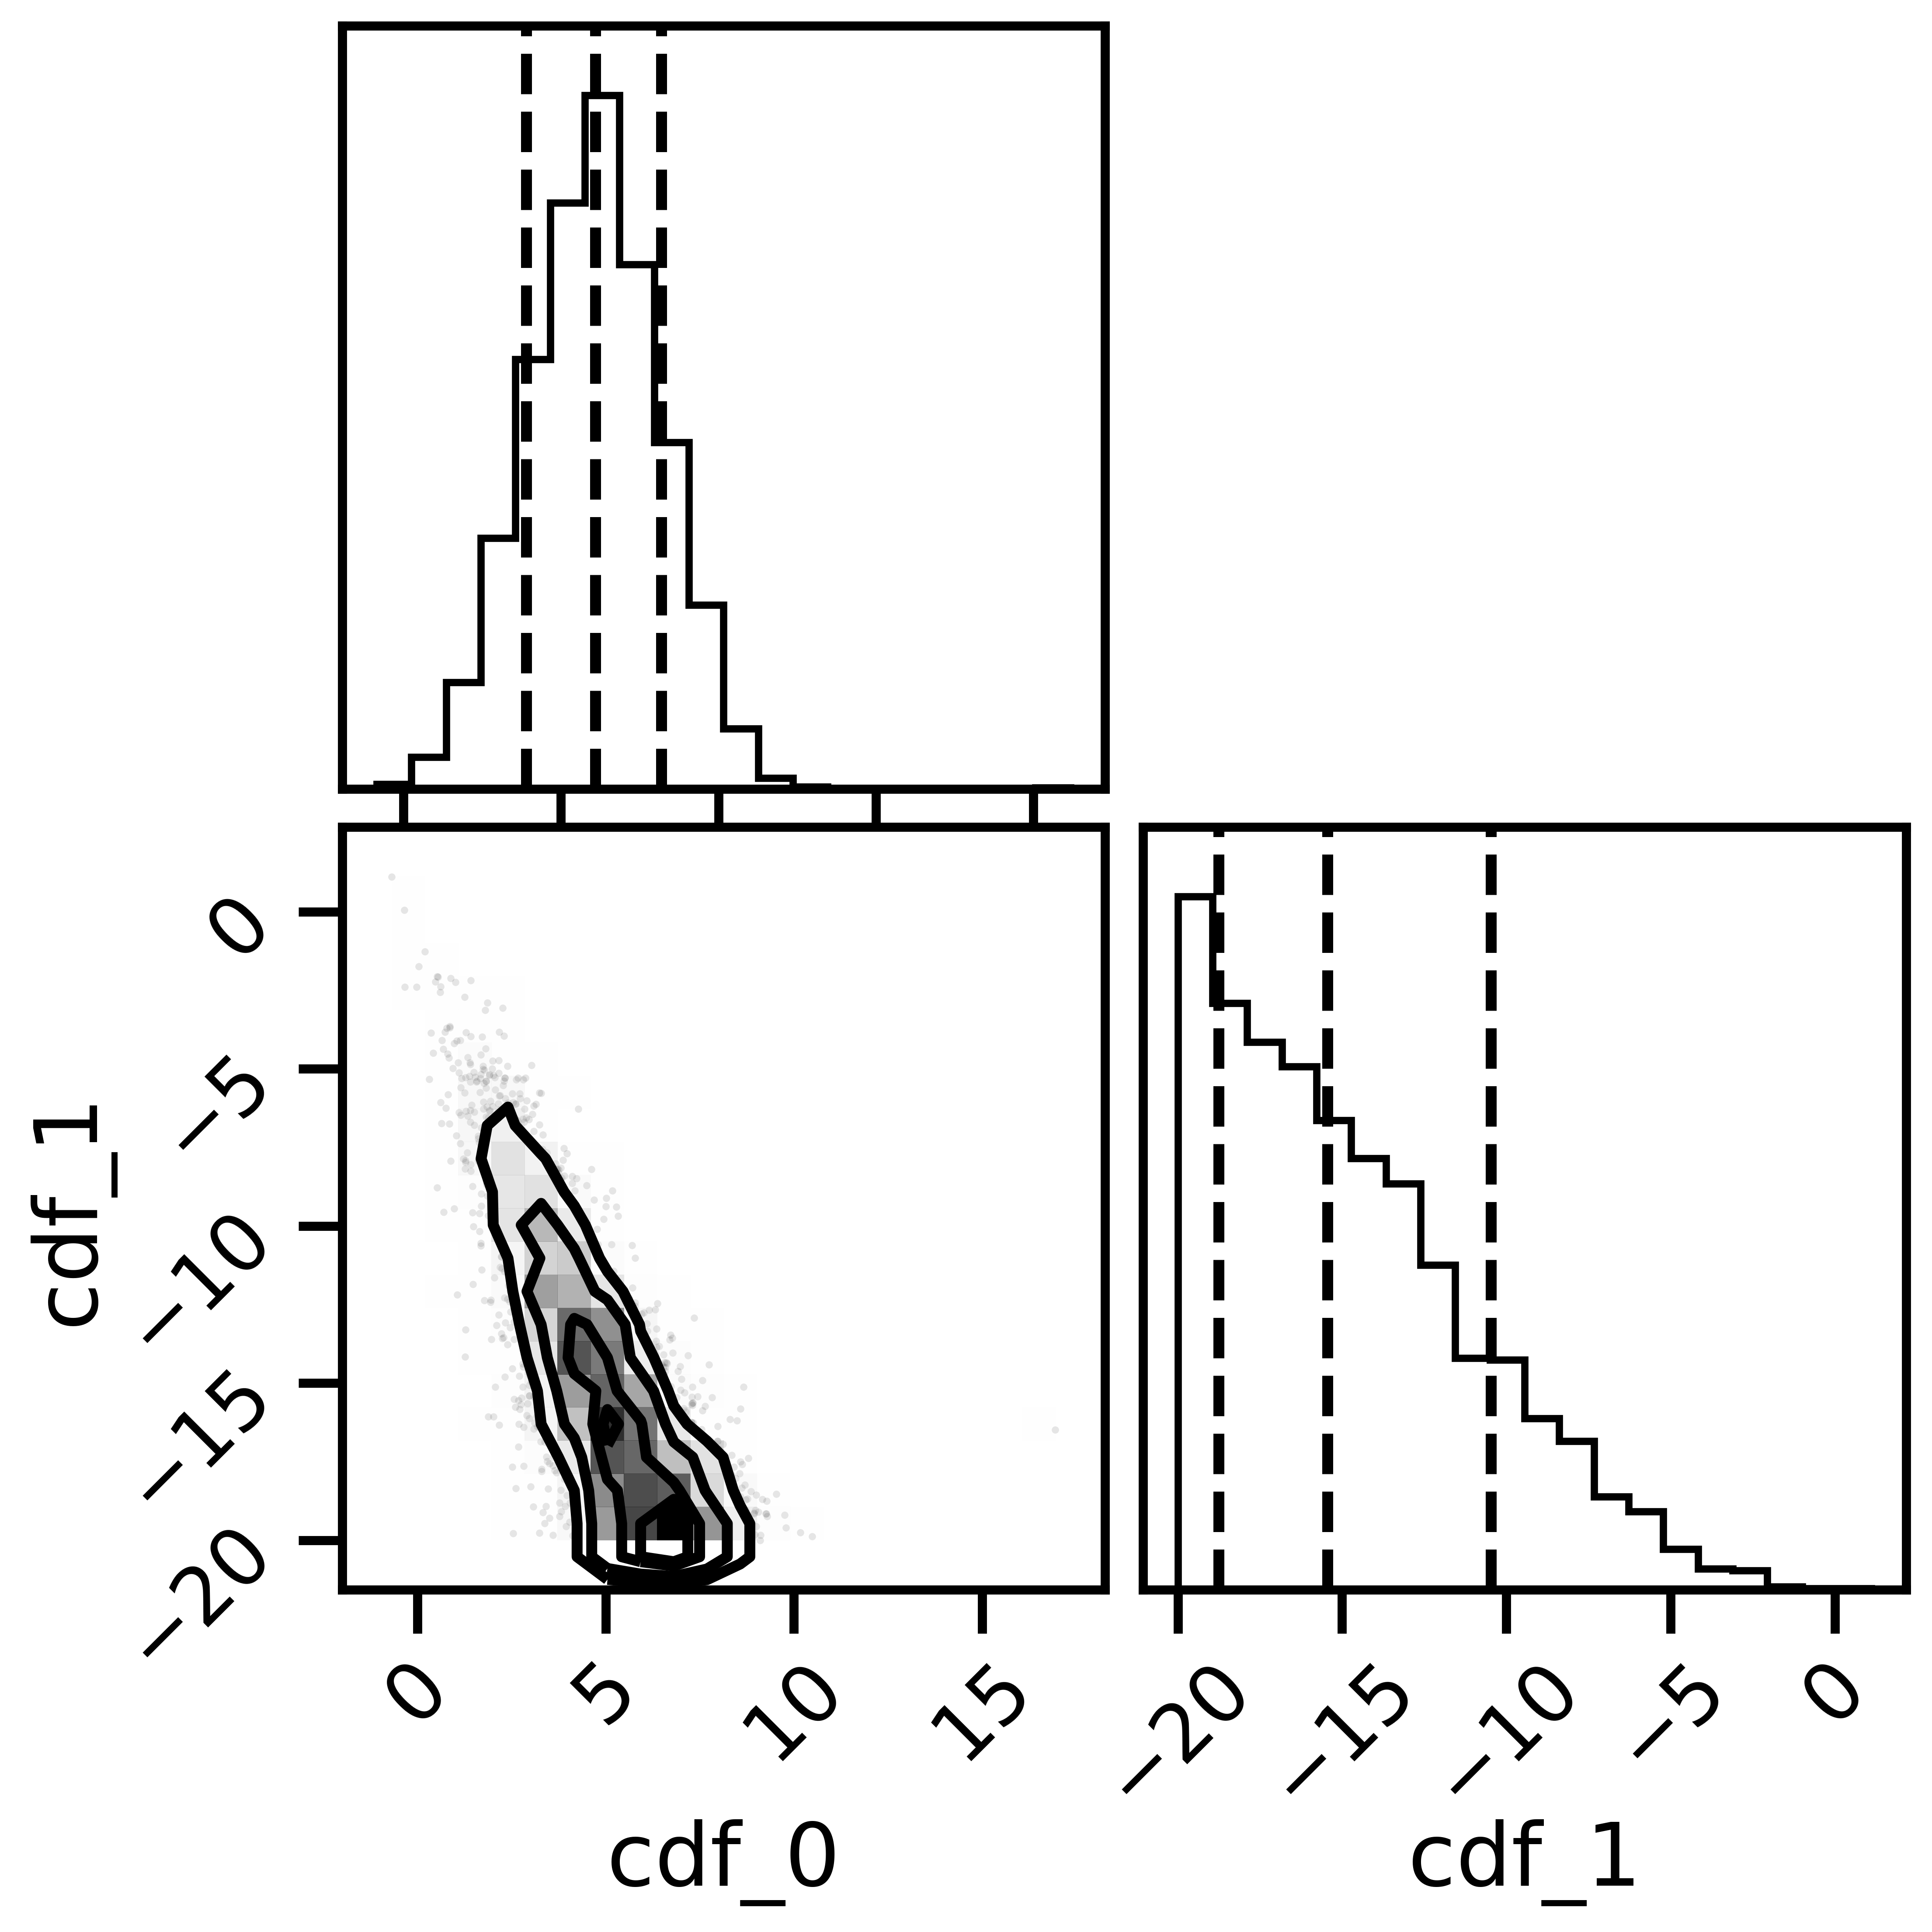

In [15]:
#corner plots
import corner
fig, axs = plt.subplots(2,2, figsize=(8,8), dpi=600)
corner.corner(mix_model.posterior,labels=['cdf_0','cdf_1'],quantiles=[0.16, 0.5, 0.84],fig=fig)
plt.show()

### 4. Predictions

In [10]:
_,mean_prior,CI_prior, _ = mix_model.prior_predict(plot_g, CI=[5,20,80,95])
_,mean,CI, _ = mix_model.predict(plot_g, CI=[5,20,80,95])

(10000, 2)
using provided samples instead of posterior


In [11]:
per5, per20, per80, per95 = CI
prior5, prior20, prior80, prior95 = CI_prior

In [12]:
# Map value prediction for the step mixing function parameter
map_prediction = mix_model.evaluate(mix_model.map, plot_g)

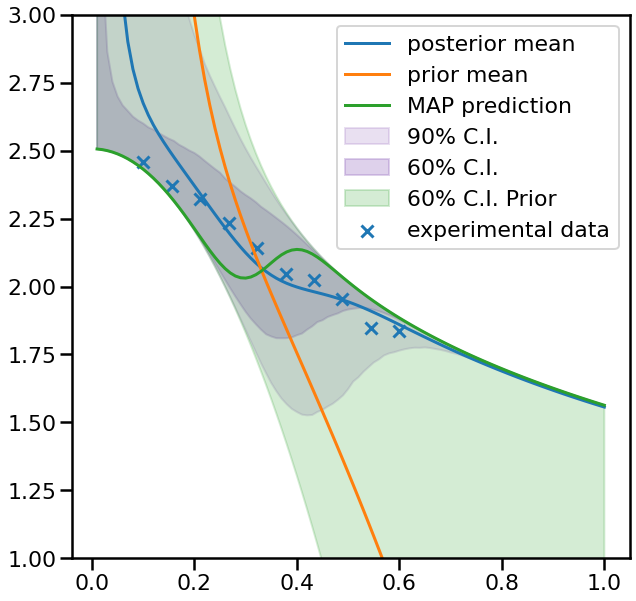

In [13]:
%matplotlib inline
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(plot_g, mean, label='posterior mean')
ax.fill_between(plot_g,per5,per95,color=sns.color_palette()[4], alpha=0.2, label='90% C.I.')
ax.fill_between(plot_g,per20,per80, color=sns.color_palette()[4], alpha=0.3, label='60% C.I.')
ax.fill_between(plot_g,prior20,prior80,color=sns.color_palette()[2], alpha=0.2, label='60% C.I. Prior')
ax.scatter(g,exp_data[0], marker='x', label='experimental data')
ax.plot(plot_g, mean_prior, label='prior mean')
ax.plot(plot_g, map_prediction.flatten(), label='MAP prediction')
ax.set_ybound(1,3)
ax.legend()